# Penelitian untuk memenuhi syarat S1 Ilmu Komputer
oleh : Candra Irawan \
NIM  : 1711016210003 \
tanggal mulai : November 2022 \\

## Klasifikasi Aktivitas Manusia Menggunakan metode CNN Arsitektur MobileNetV3 Dengan Transfer Learning dan Data Augmentation
Dataset **Human Action Recogniton** (https://www.kaggle.com/datasets/emirhanai/human-action-detection-artificial-intelligence) .\
Arsitektur yang digunakan **MobileNetV3 Large dan Small** dengan menggunkan alpha masing-masing **1.0** dan **0.75** . \
Transfer Learning **ImageNet.** \
Dataset memiliki dua pendekatan **tanpa Augmentation** dan **dengan augmentation**. \

Augmentation yang digunakan antara lain :

1.  random rotation (30 derajat).
2.  flip (true/false).
3.  random erashing. 

calsifier MLP\
**flatten-dropout-fcl-dropout-fcl-dropout-fcl(sofmax)**\
or\
**flatten-sparse-sparse-sparse(softmax)**











# install pakages yang akan digunakan


In [ ]:
!pip install tensorflow-addons #pakage tambahan pada tansorflow didalam pakage ini ada cyclical learning rate
!pip install tensorflow

: 

# Import pakages agar bisa digunakan



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
from keras.preprocessing.image  import ImageDataGenerator
from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from keras.models import Sequential, load_model, save_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.applications.mobilenet_v3 import preprocess_input
from keras.backend import flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import *
from clr_callback import *
from random_eraser import get_random_eraser
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.backend import flatten
from sklearn.metrics import confusion_matrix
import itertools

# Mempersiapkan data yang akan digunakan dalam penelitian



pada bagian ini akan dilakukan pembagian data. \
Total gambar dataset untuk melatih : 15000 \
Total gambare dataset untuk uji coba : 3000 

dataset akan dibagi 80% sebagai data latih dan 20% data uji

## Mempersiapkan ImageDataGenerator untuk penerapan Augmentation

In [2]:
#image data generator dibawah akan digunakan pada data teasting pendekatan Tanpa Augmentation.
TanpaAugmen=ImageDataGenerator()

#image data generator dibawah akan digunakan pada data teasting pendekatan Dengan Augmentation.
DenganAugmen=ImageDataGenerator(
                               rotation_range=30,
                               horizontal_flip=True,
                               vertical_flip=False,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               fill_mode='nearest', 
                               preprocessing_function=get_random_eraser(v_l=0, v_h=1,pixel_level=True),                          
                               )


## Memasukan data gambar kedalam variable menggunakan ImageDataGenerator

In [3]:

train_generator_TA = TanpaAugmen.flow_from_directory("emirhan_human_dataset/datasets/human_data/train_data",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    interpolation="nearest")

train_generator_DA = DenganAugmen.flow_from_directory("emirhan_human_dataset/datasets/human_data/train_data",
                                                    target_size=(224, 224) ,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    interpolation="nearest")

test_generator = TanpaAugmen.flow_from_directory("emirhan_human_dataset/datasets/human_data/test_data",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

valid_generator = TanpaAugmen.flow_from_directory("emirhan_human_dataset/datasets/human_data/test_data",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 15000 images belonging to 15 classes.
Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## kode dibawah merupakan fungsi menampilkan gambar perbatch

In [4]:
def show_image_samples(gen):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<32:   #show maximum of 25 images
        r=length
    else:
        r=32
    for i in range(r):        
        plt.subplot(6, 6, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()

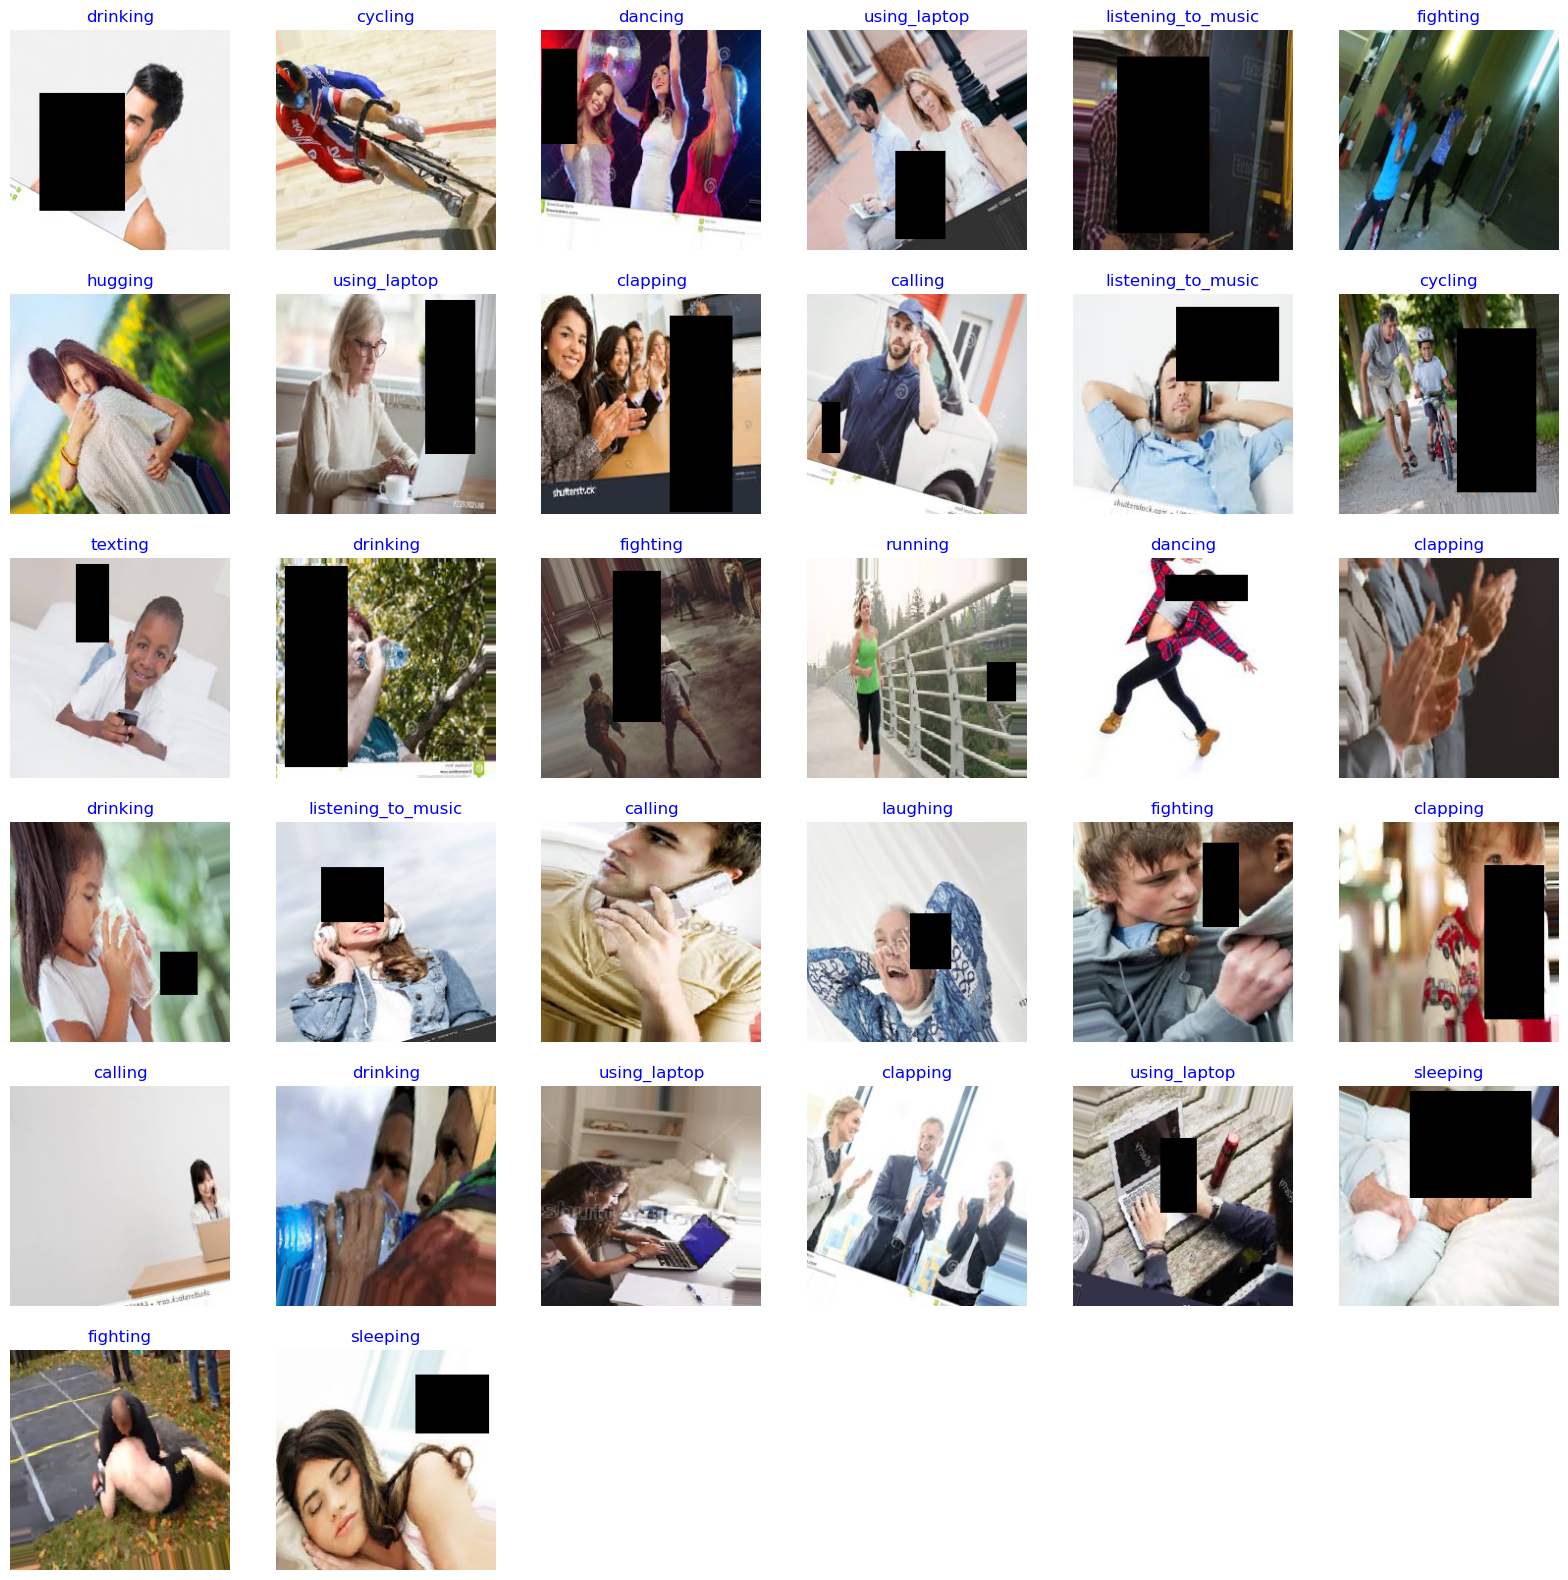

In [5]:
show_image_samples(train_generator_DA)

# MEMPERSIAPKAN Arsitektur YANG AKAN DIGUNAKAN

model yang digunakan adalah MobileNetV3 Large dan Small \
dengan menggunakan alpha 1.0 dan 0.75 pada tiap-tiap model \
arsitektur yang digunakan akan menerapkan transfer learning \
transfer learning yang digunakan adalah **ImageNet** \
bobot pada layer pada arsitektur akan dikunci (freeze) 






## Empat Kode dibawah memanggil Arsitektur dengan Transfer Learning ImageNet (tidak perlu run semua, cukup pilih salah satu sesuai alur penelitian)


arsitektur MobileNetV3-Small alpha 0.75

In [ ]:
pretrained_model= tf.keras.applications.MobileNetV3Small(include_top=False,
                                                                   alpha=0.75,                                      
                                                                   input_shape=(224,224,3),
                                                                   pooling='avg',
                                                                   classes=15,
                                                                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

arsitektur MobileNetV3-Small alpha 1

In [ ]:
pretrained_model= tf.keras.applications.MobileNetV3Small(include_top=False,
                                                                   alpha=1.0,                                      
                                                                   input_shape=(224,224,3),
                                                                   pooling='avg',
                                                                   classes=15,
                                                                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=True

arsitektur MobileNetV3-Large alpha 0.75

In [ ]:
pretrained_model= tf.keras.applications.MobileNetV3Large(include_top=False,
                                                                   alpha=0.75,                                      
                                                                   input_shape=(224,224,3),
                                                                   pooling='avg',
                                                                   classes=15,
                                                                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=True

arsitektur MobileNetV3-Large alpha 1

In [6]:
pretrained_model= tf.keras.applications.MobileNetV3Large(include_top=False,
                                                                   alpha=1.0,                                      
                                                                   input_shape=(224,224,3),
                                                                   pooling='avg',
                                                                   classes=15,
                                                                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=True

## Mempersiapkan Clasifier

In [12]:
regularizer = 'l2'

classifier = Sequential()
classifier.add(Flatten())
classifier.add(Dropout(0.4))
classifier.add(Dense(units=728, activation="ReLU", kernel_regularizer=regularizer))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=256, density=0.3, activation="ReLU", kernel_regularizer=regularizer))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=15, density=0.2, activation="softmax", kernel_regularizer=regularizer))


## Mempersiapkan ModelCallback untuk menyimpan model dengan val_loss terendah

In [13]:
BASE_LR = 1e-3
MAX_LR = 6e-3
BATCH_SIZE = 32
CLR_METHOD = "triangular2"
NUM_EPOCHS = 150
step_size = 5 * (len(train_generator_TA))

checkpoint_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='hasil_penelitian/MobileNetV3 Large 1.0 DA uf 0.4-728-0.3-256-0.2-15 USN.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1),

    CyclicLR(base_lr=BASE_LR,
                  max_lr=MAX_LR,
                  step_size=step_size,
                  mode='triangular2')
    ]

optimizer = tf.keras.optimizers.Adam(BASE_LR)

## Mempersiapkan Model
pendekatan pada proses pelatihan dengan dan tanpa Augmentation \

**sehingga terdapat 8 model pada akhir penelitian** \


1.   MobileNetV3 Small 0.75 Tanpa Augmentation **(Model_1)**
2.   MobileNetV3 Small 1.00 Tanpa Augmentation **(Model_2)**
3.   MobileNetV3 Large 0.75 Tanpa Augmentation **(Model_3)**
4.   MobileNetV3 Large 1.00 Tanpa Augmentation **(Model_4)**
5.   MobileNetV3 Small 0.75 Dengan Augmentation **(Model_5)**
6.   MobileNetV3 Small 1.00 Dengan Augmentation **(Model_6)**
7.   MobileNetV3 Large 0.75 Dengan Augmentation **(Model_7)**
8.   MobileNetV3 Large 1.00 Dengan Augmentation **(Model_8)**

In [15]:
#menggabungkan pretrained arsitektur dengan classifier
model= Sequential()
model.add(pretrained_model) #sesuaikan dengan arsitektur yang dipanggil sebelumnya
model.add(classifier)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

#menampilkan layer pada model
model.summary()
pretrained_model_Large_100.summary()
classifier.summary()

weight_type used:  1
weight_type used:  1
weight_type used:  1
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3large (Functional (None, 1280)              4226432   
_________________________________________________________________
sequential (Sequential)      (None, 15)                430413    
Total params: 4,656,845
Trainable params: 4,632,445
Non-trainable params: 24,400
_________________________________________________________________
Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Resca

**pelatihan Model_1**

pilih data latih yang di inginkan dengan mengganti "x"

dengan augmentasi = train_generatot_DA

tanpa augmentasi = train_generator_TA

In [16]:
history = model.fit(
                         x=train_generator_DA,
                         batch_size=BATCH_SIZE,
                         epochs=NUM_EPOCHS,
                         validation_data=test_generator,
                         callbacks= checkpoint_list,
                       )

Epoch 1/150
 35/469 [=>............................] - ETA: 3:21 - loss: 2.4758 - accuracy: 0.1705

**Menyimpan Data dari history ke dalam bentuk .csv** \
hal ini dilakukan agar dapat melakukan ploting di lain waktu

In [ ]:
hist_df = pd.DataFrame(history.history)

hist_csv_file = 'hasil_penelitian/Hasil_Training_.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

**Kode dibawah untuk menampilkan menampilkan learning rate setiap stepnya**

In [ ]:
import matplotlib.pyplot as plt

def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    #axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    #axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    return index_loss
    
loss_index=tr_plot(history,0)

In [ ]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.style.use('fivethirtyeight')
plt.plot(checkpoint_list[1].history['iterations'], checkpoint_list[1].history['lr'])

**Save Model** \
agar dapat di uji coba untuk melihat hasil dari confussion matrix

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('hasil_penelitian\MobileNetV3 Large 1.0 DA uf 0.4-728-0.3-256-0.2-15 L1L2.h5')

**pembuatan confussion matrik**

In [ ]:
from tensorflow.python import test
score = model.evaluate(valid_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.style.use('default')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = valid_generator.class_indices

#Confution Matrix
cm = confusion_matrix(valid_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))